In [1]:
# Importing thr Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset

heart = pd.read_csv(r"C:\Users\Shashi\Downloads\heart.csv")

In [9]:
# Importing warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Looking at the head of data

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Checking the information of data

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Checking the duplicates

heart.duplicated().sum()

0

In [10]:
# EDA - exploratory data analysis

# 1st Business Moment : Measures of Central Tendency - Mean, Median, Mode

heart.mean()

Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

In [11]:
heart.median()

Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

In [12]:
heart.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


In [13]:
# 2nd Business Moment : Measures of Dispersion - standard deviation, Variance

heart.std()

Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

In [14]:
heart.var()

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

In [15]:
# 3rd Business Moment : Measures of Skewness

heart.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [16]:
# 4th Business Moment : Measures of Kurtosis

heart.kurt()

Age            -0.386140
RestingBP       3.271251
Cholesterol     0.118208
FastingBS      -0.401960
MaxHR          -0.448248
Oldpeak         1.203064
HeartDisease   -1.958008
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb0952850>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb0952df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb0952580>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcb09693d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb09696a0>],
 'means': []}

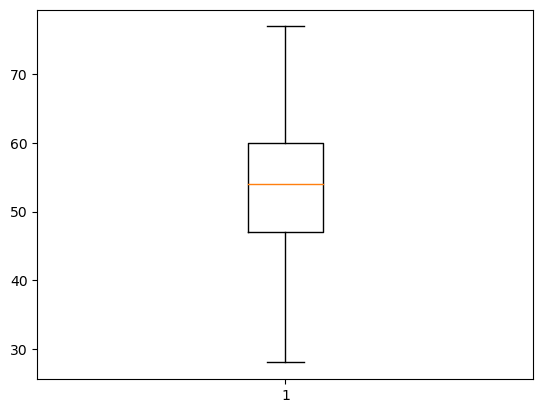

In [18]:
# Graphical Representation

plt.boxplot(heart['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb09c57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb09c5d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb09c5520>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcb09d23a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb09d2670>],
 'means': []}

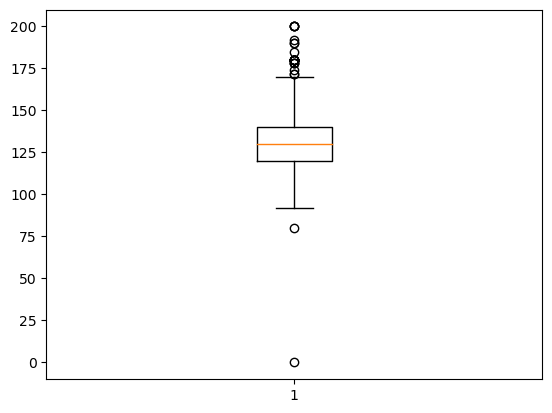

In [19]:
plt.boxplot(heart['RestingBP'])

<AxesSubplot:xlabel='RestingBP'>

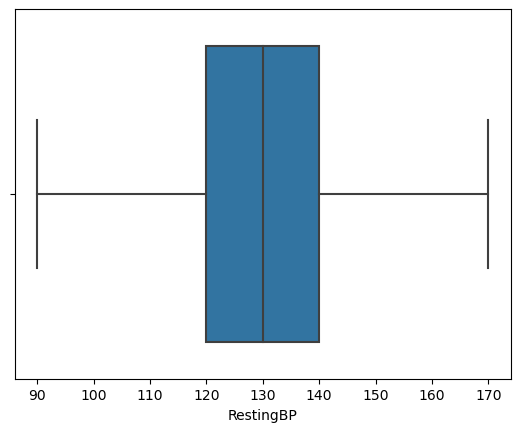

In [24]:
# To Clean outliers we use Winsorization

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                 variables = ('RestingBP'))

data_iqr = winsor_iqr.fit_transform(heart[['RestingBP']])

sns.boxplot(data_iqr['RestingBP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb0e07c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb0e161f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb0dfa790>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcb0e16790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb0e16a60>],
 'means': []}

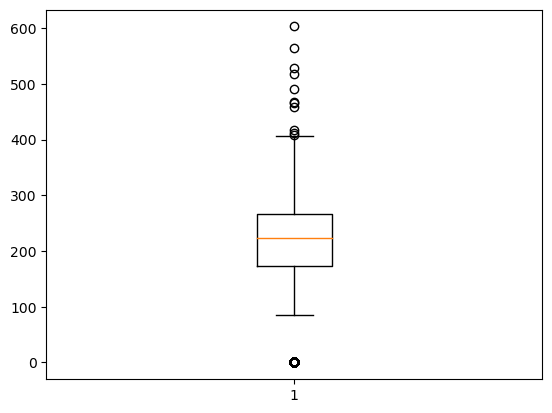

In [25]:
plt.boxplot(heart['Cholesterol'])

<AxesSubplot:xlabel='Cholesterol'>

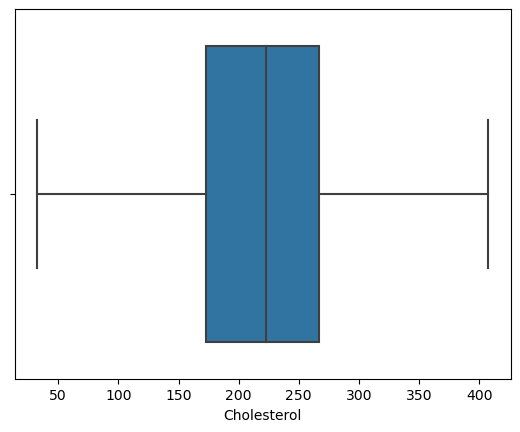

In [26]:
# To Clean outliers we use Winsorization

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                 variables = ('Cholesterol'))

data_iqr = winsor_iqr.fit_transform(heart[['Cholesterol']])

sns.boxplot(data_iqr['Cholesterol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb1002f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb0ea1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb0ff3b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcb0ea1af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb0ea1dc0>],
 'means': []}

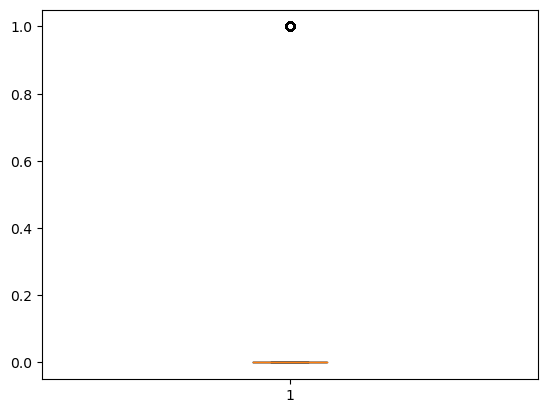

In [27]:
plt.boxplot(heart['FastingBS'])

<AxesSubplot:xlabel='FastingBS'>

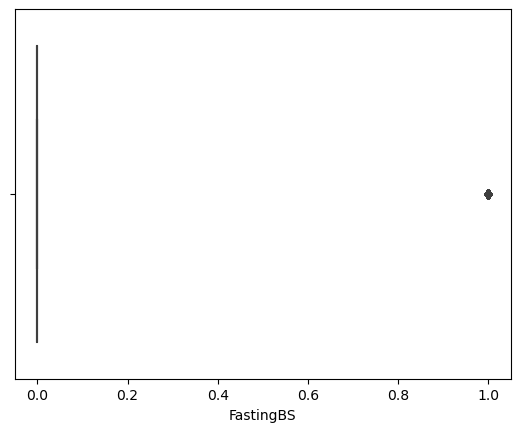

In [30]:
# To Clean outliers we use Winsorization

from feature_engine.outliers import Winsorizer

winsor_pres = Winsorizer(capping_method = 'quantiles',
                              tail = 'both',
                                fold = 0.03,
                                 variables = ('FastingBS'))

data_iqr = winsor_pres.fit_transform(heart[['FastingBS']])

sns.boxplot(data_iqr['FastingBS'])

In [31]:
# Sometimes the outiers will be so smalll to remove, so we leave it.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb0f6a580>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb0f6ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb0f6a2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcb0f79130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb0f79400>],
 'means': []}

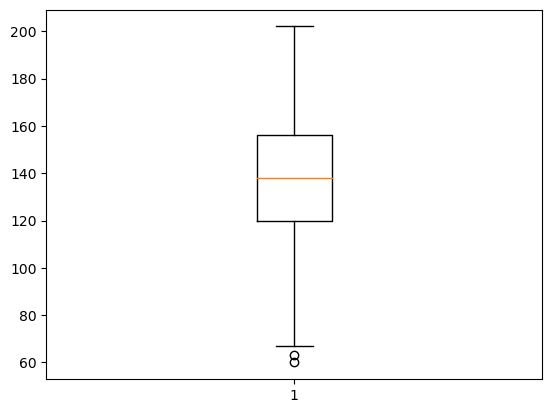

In [32]:
plt.boxplot(heart['MaxHR'])

<AxesSubplot:xlabel='MaxHR'>

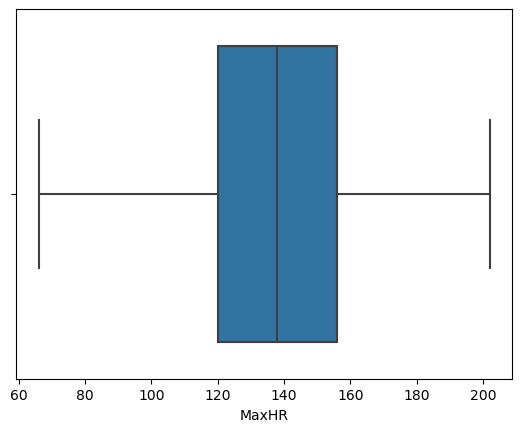

In [33]:
# To Clean outliers we use Winsorization

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                 variables = ('MaxHR'))

data_iqr = winsor_iqr.fit_transform(heart[['MaxHR']])

sns.boxplot(data_iqr['MaxHR'])

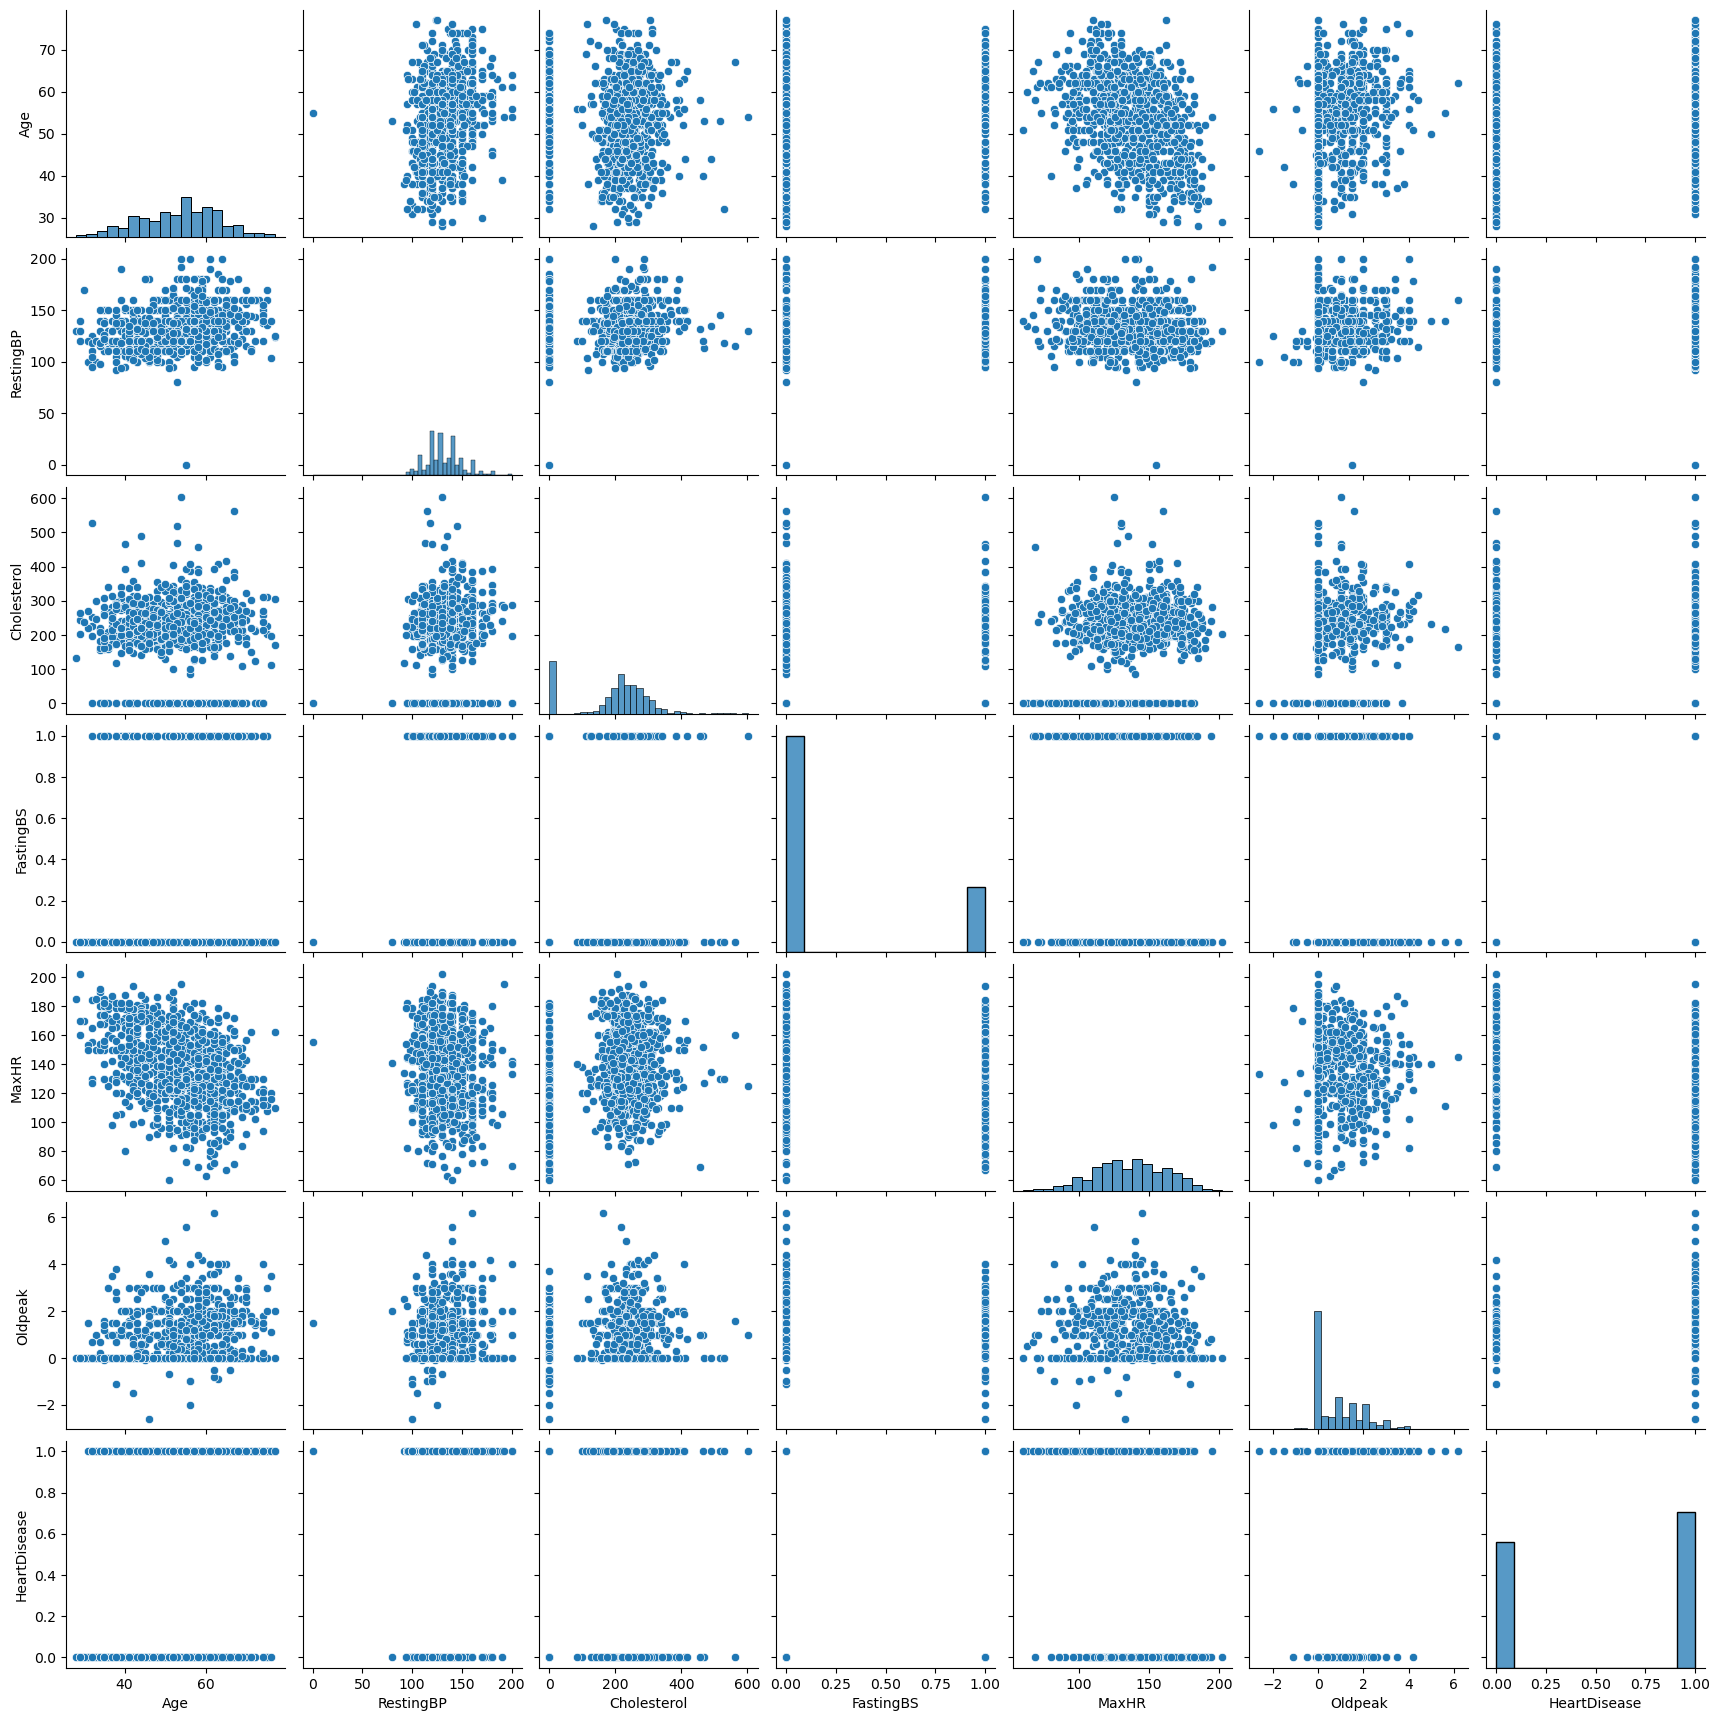

In [35]:
sns.pairplot(heart)

In [36]:
# Checking the missing data

heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [38]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
heart['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [40]:
heart['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [42]:
# Type casting

heart['ChestPainType'] = heart['ChestPainType'].astype('str')
heart['RestingECG'] = heart['RestingECG'].astype('str')

In [44]:
# Dummy values - LabelEncoding

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

heart['Sex'] = enc.fit_transform(heart['Sex'])
heart['ChestPainType'] = enc.fit_transform(heart['ChestPainType'])
heart['RestingECG'] = enc.fit_transform(heart['RestingECG'])
heart['ExerciseAngina'] = enc.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope'] = enc.fit_transform(heart['ST_Slope'])

In [46]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [47]:
# Checking the describe

heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [48]:
# Standardization - Scaling min = 0, max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [49]:
data = norm_fun(heart)
heart = pd.DataFrame(data)
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.260349,0.661983,0.329684,0.233115,0.494553,0.540911,0.404139,0.396291,0.680828,0.553377
std,0.192502,0.407701,0.318840,0.092571,0.181400,0.423046,0.315836,0.179298,0.490992,0.121201,0.303528,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.600000,0.287313,0.000000,0.500000,0.422535,0.000000,0.295455,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.650000,0.369818,0.000000,0.500000,0.549296,0.000000,0.363636,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Checking the correlation

heart.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<AxesSubplot:>

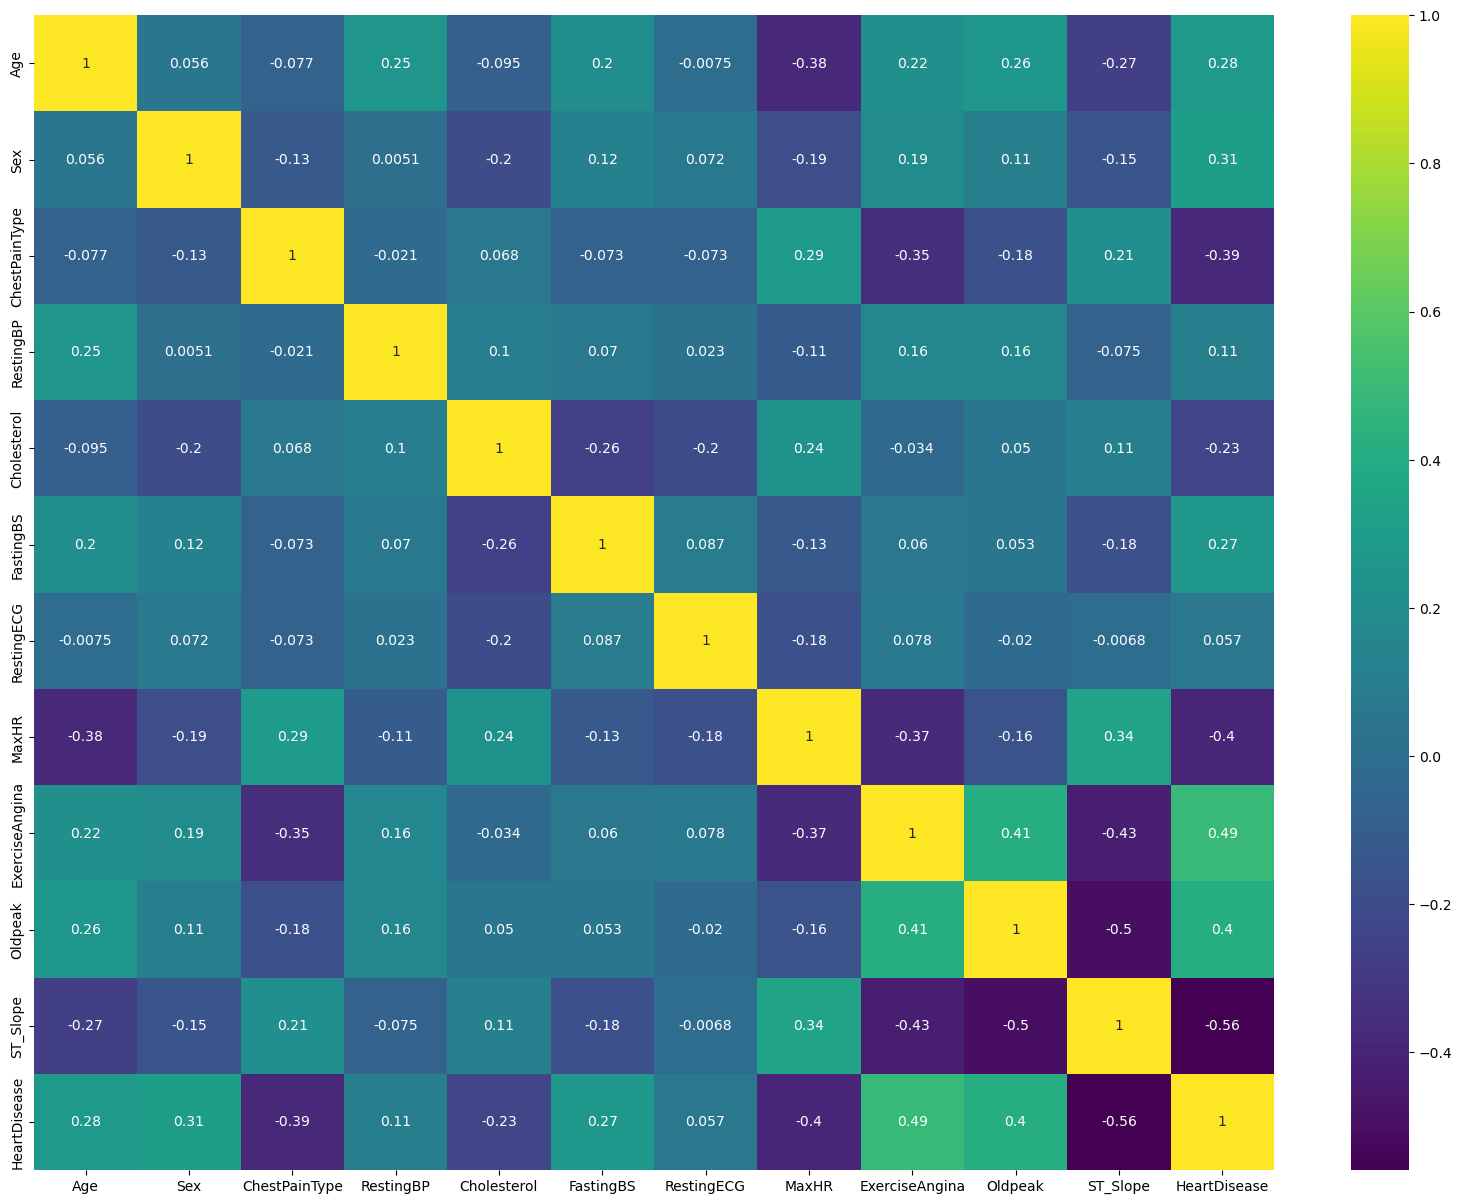

In [51]:
# Heatmap

fig = plt.figure(figsize = (20, 15))
sns.heatmap(heart.corr(), cmap = 'viridis', annot = True)

In [52]:
# Spliting the data

X = heart.drop('HeartDisease', axis = 1)
Y = heart.HeartDisease

In [55]:
# Loading train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [58]:
# Model Building

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# Checking the model score

model.score(X,Y)

0.8562091503267973

In [59]:
model.score(x_train, y_train)

0.8582554517133957

In [60]:
model.score(x_test, y_test)

0.8514492753623188

In [61]:
y_pred = model.predict(x_test)

In [63]:
# Confusion matrix score, Accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 91  22]
 [ 19 144]]


0.8514492753623188

In [64]:
y_test[:5]

306    1.0
711    0.0
298    1.0
466    1.0
253    0.0
Name: HeartDisease, dtype: float64

In [65]:
y_pred[:5]

array([1., 1., 1., 1., 0.])

## Result : This model of Heart Disease got score of 85% in train & test, accuracy_score, this model is said to be a right fit model.